### 1. Validation, Holdout

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [204]:
df = pd.DataFrame({"X": np.linspace(0, 10, num=30)})
df['y'] = np.sin(df['X']) + np.random.normal(0, 0.1, size=30)

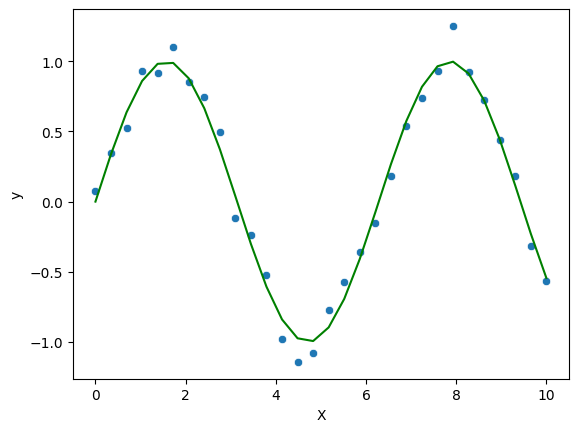

In [205]:
sns.scatterplot(df, x='X', y='y')
plt.plot(df['X'], np.sin(df['X']), color='green')

In [206]:
df.shape

(30, 2)

In [207]:
split_idx = len(df) // 5
print(split_idx)

6


In [208]:
train_df = df[:-split_idx]
test_df = df[-split_idx:]

In [209]:
X_train = train_df.drop('y', axis=1).values
y_train = train_df['y'].values

X_test = test_df.drop('y', axis=1).values
y_test = test_df['y'].values

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [211]:
model = LinearRegression()

In [212]:
model.fit(X_train, y_train)

LinearRegression()

In [213]:
preds = model.predict(X_test)

In [214]:
y_test

array([ 0.92003457,  0.72176814,  0.43705623,  0.18051939, -0.31360018,
       -0.56644582])

In [215]:
mean_squared_error(y_test, preds)

np.float64(0.3407296428917233)

In [19]:
# mean_squared_error(np.log(y_test), np.log(preds))

In [216]:
samples = np.linspace(df['X'].min(), df['X'].max(), num=1000)
samples_y = [model.predict([[x]]) for x in samples]

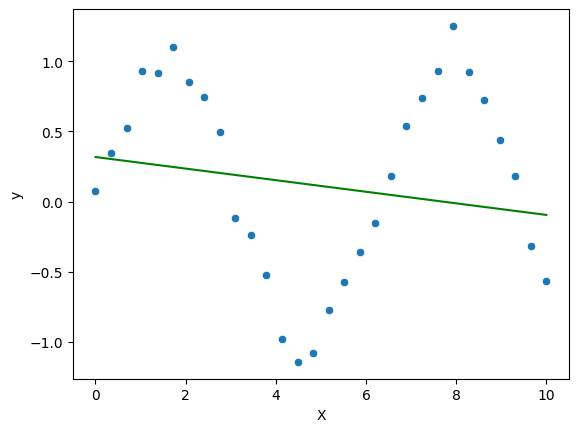

In [217]:
sns.scatterplot(df, x='X', y='y')
plt.plot(samples, samples_y, color='green')

In [218]:
from sklearn.preprocessing import PolynomialFeatures
from tqdm.notebook import tqdm

In [219]:
def polynomial_regression(data_frame, degree=2):
    feature_extraction = PolynomialFeatures(degree=degree)
    new_df = data_frame.copy()
    X = feature_extraction.fit_transform(data_frame.drop('y', axis=1))

    split_idx = len(df) // 5
    X_train = X[:-split_idx]
    y_train = df[:-split_idx]['y'].values
    
    X_test = X[-split_idx:]
    y_test = df[-split_idx:]['y'].values

    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    preds_train = model.predict(X_train)

    print(f"MSE test: {mean_squared_error(y_test, preds)}")
    print(f"MSE train: {mean_squared_error(y_train, preds_train)}")

    return model, feature_extraction, mean_squared_error(y_test, preds), mean_squared_error(y_train, preds_train)

def plot_model(model, df, feature_extraction):
    samples = np.linspace(df['X'].min(), df['X'].max(), num=1000)
    samples_y = [model.predict(feature_extraction.transform([[x]])) for x in samples]
    sns.scatterplot(df, x='X', y='y')
    plt.plot(samples, samples_y, color='green')
    plt.show()

In [37]:
# !rye add ipywidgets widgetsnbextension 

In [237]:
result_test = []
result_train = []

for d in tqdm(list(range(2, 22))):
    model, fe, p_test, p_train = polynomial_regression(df, degree=d)
    # plot_model(model, df, fe)

    result_test.append(p_test)
    result_train.append(p_train)

  0%|          | 0/20 [00:00<?, ?it/s]

MSE test: 3.728159045449207
MSE train: 0.30271242743394466
MSE test: 37.62998534724218
MSE train: 0.10360331139959782
MSE test: 0.352046323024306
MSE train: 0.03073645234538291
MSE test: 31.69430744067866
MSE train: 0.018314385648751933
MSE test: 63.47914095232047
MSE train: 0.007196590051622316
MSE test: 253.90460902547022
MSE train: 0.006607687393245095
MSE test: 7.528236481542145
MSE train: 0.006359342345506576
MSE test: 446.21546018427927
MSE train: 0.006259319965377159
MSE test: 4679.002947518259
MSE train: 0.0060674108014060245
MSE test: 433104.81125331164
MSE train: 0.005055470445863043
MSE test: 522192.3425172258
MSE train: 0.00505409745484474
MSE test: 3984640.8942043595
MSE train: 0.004799545265158635
MSE test: 80085487.31436673
MSE train: 0.0043271753364297625
MSE test: 419179424.8134933
MSE train: 0.004098689440254331
MSE test: 827657837.4051237
MSE train: 0.0041539699672738335
MSE test: 1219689459.3997562
MSE train: 0.004455691202599087
MSE test: 100959828785.79614
MSE tra

In [227]:
result_train

[np.float64(0.30271242743394466),
 np.float64(0.10360331139959782),
 np.float64(0.03073645234538291),
 np.float64(0.018314385648751933),
 np.float64(0.007196590051622316),
 np.float64(0.006607687393245095),
 np.float64(0.006359342345506576),
 np.float64(0.006259319965377159)]

In [229]:
feature_extraction = PolynomialFeatures(degree=9)

In [233]:
feature_extraction.fit_transform(df.drop('y', axis=1)).shape

(30, 10)

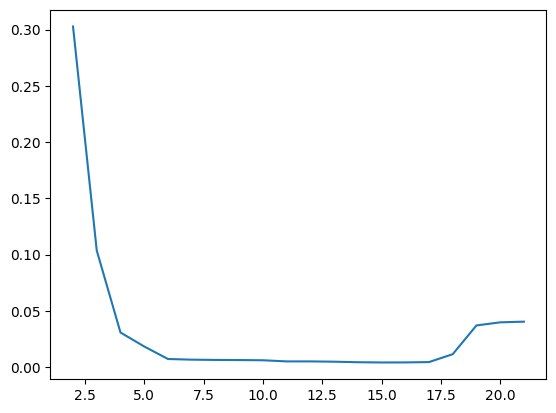

In [238]:
plt.plot(range(2, 22), result_train, label='train')

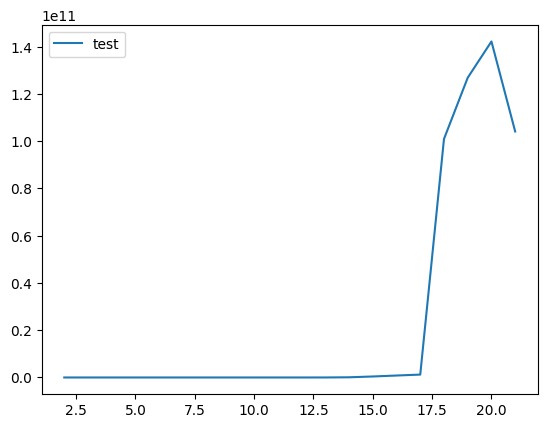

In [239]:
# plt.plot(range(2, 8), result_train[:-2], label='train')
plt.plot(range(2, 22), result_test, label='test')
plt.legend()

In [235]:
# plt.plot(range(2, 10), result_train, label='train')

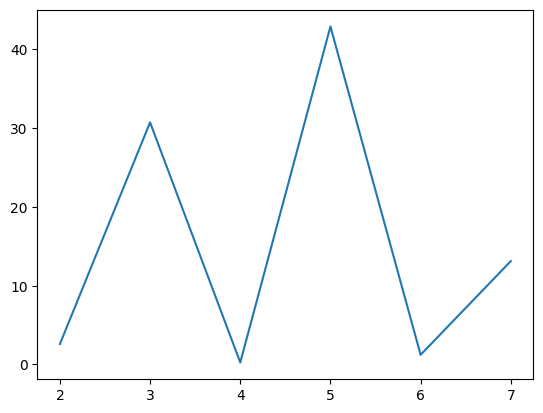

In [60]:
plt.plot(range(2, 8), result_test[:-2])

In [148]:
samples = np.linspace(df['X'].min(), df['X'].max(), num=1000)
samples_y = [model.predict(feature_extraction.transform([[x]])) for x in samples]

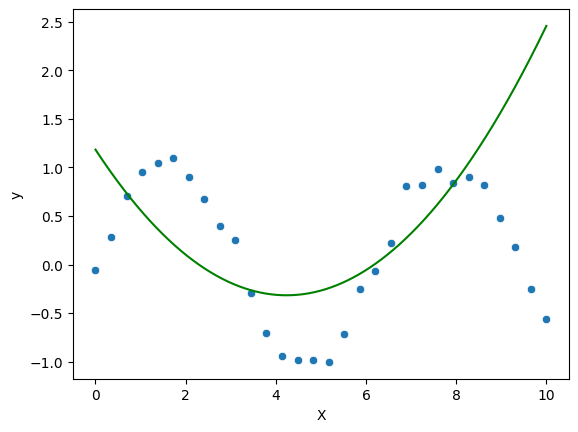

In [150]:
sns.scatterplot(df, x='X', y='y')
plt.plot(samples, samples_y, color='green')

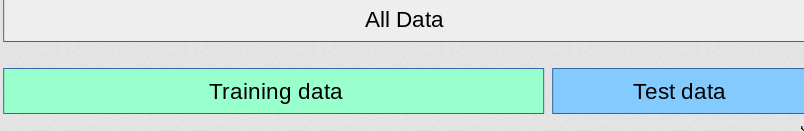

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
def polynomial_regression_sklearn(data_frame, degree=2):
    feature_extraction = PolynomialFeatures(degree=degree)
    new_df = data_frame.copy()
    X = feature_extraction.fit_transform(data_frame.drop('y', axis=1))

    X_train, X_test, y_train, y_test = train_test_split(X, df['y'], test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    return model, feature_extraction

**Question:** Для чого нам параметр random_state у train_test_split?

In [242]:
model, fe = polynomial_regression_sklearn(df, degree=20)

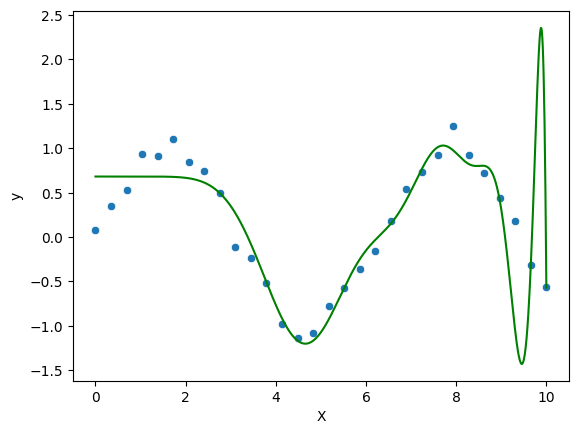

In [243]:
plot_model(model, df, fe)

In [83]:
df[:10]

,X,y
0,0.000000,0.107502
1,0.344828,0.405869
2,0.689655,0.493793
3,1.034483,0.895350
4,1.379310,1.023827
5,1.724138,1.007410
6,2.068966,0.714929
7,2.413793,0.767388
8,2.758621,0.405832
9,3.103448,0.134091


In [244]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.2, random_state=42)

In [245]:
y_test

27    0.180519
15   -0.775064
23    1.251790
17   -0.356731
8     0.498496
9    -0.116953
Name: y, dtype: float64

In [246]:
X_test

27    9.310345
15    5.172414
23    7.931034
17    5.862069
8     2.758621
9     3.103448
Name: X, dtype: float64

### 1.2. k-fold validation
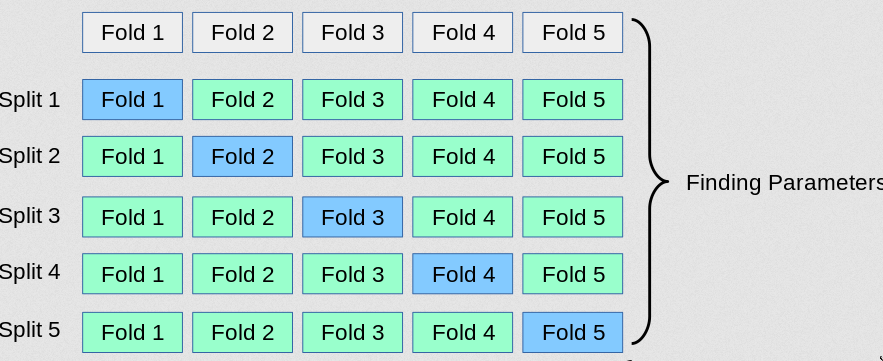

In [89]:
from sklearn.model_selection import KFold

In [97]:
kf = KFold(n_splits=2)

**Question:** якщо в нас n_splits=2 та кількість об'єктів у всьому датасеті n=30. Тоді якого розміру будуть тест сети?

In [98]:
for i, (train_index, test_index) in enumerate(kf.split(df)):
    print(len(train_index), len(test_index))

15 15
15 15


### 1.3. Time series validation

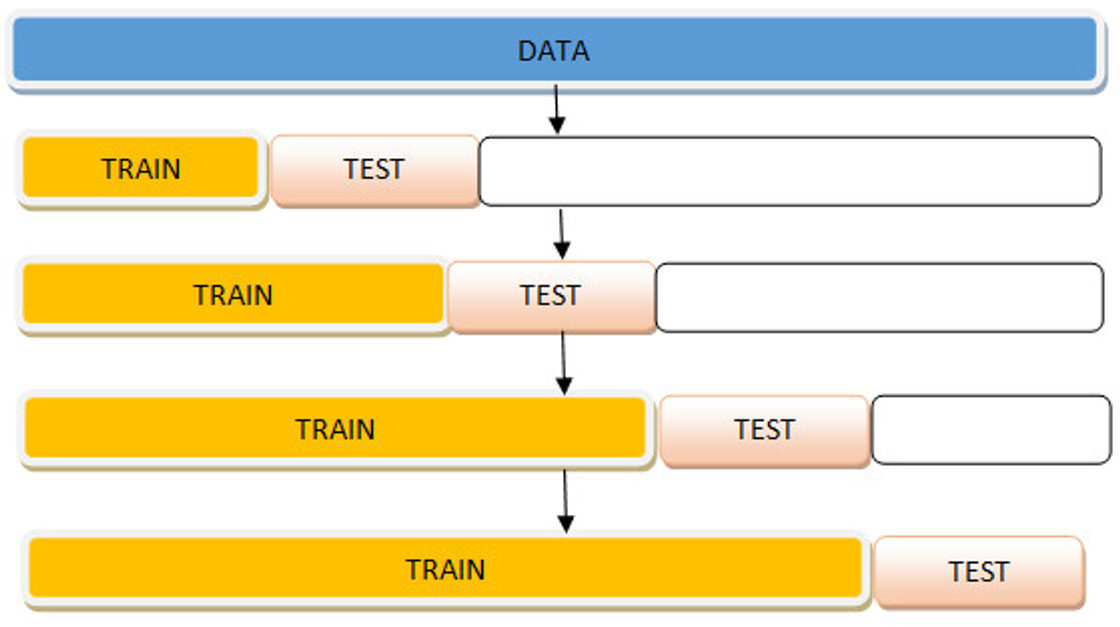

### Error distribution

In [247]:
N = 100000
df = pd.DataFrame({"X": np.linspace(0, 10, num=N)})
df['y'] = np.sin(df['X']) + np.random.normal(0, 0.1, size=N)

In [255]:
model = LinearRegression()

feature_extraction = PolynomialFeatures(degree=10)
new_df = df.copy()
X = feature_extraction.fit_transform(df.drop('y', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, df['y'], test_size=0.2, random_state=42)

model.fit(X_train, y_train)

LinearRegression()

In [256]:
preds_train = model.predict(X_train)

<Axes: xlabel='y', ylabel='Density'>

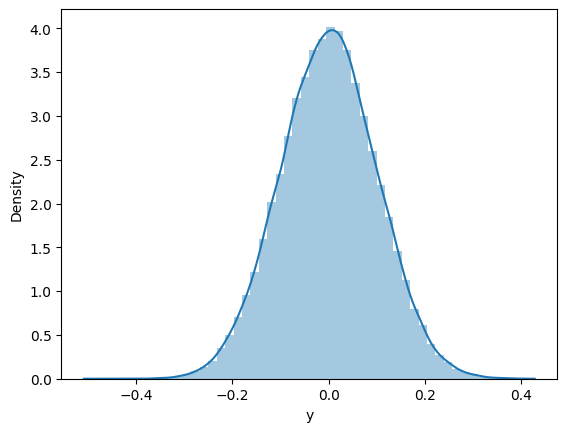

In [257]:
sns.distplot(y_train - preds_train)

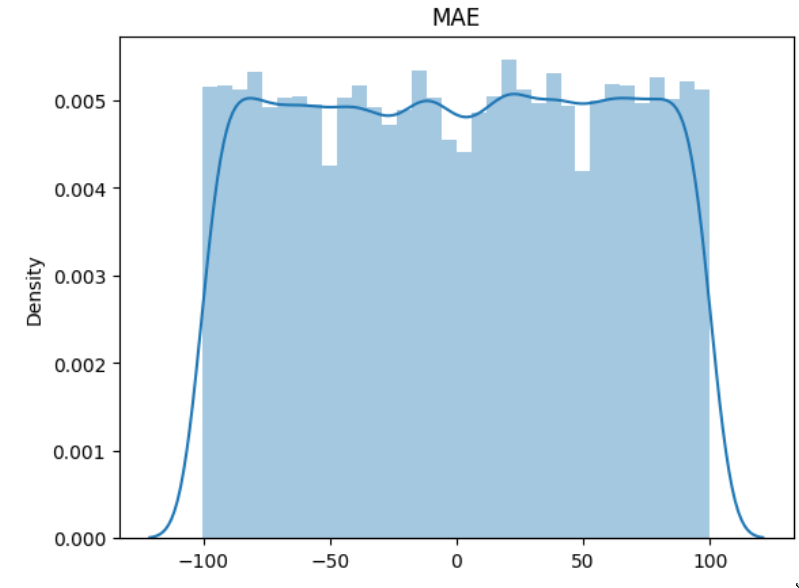

### Archive 

In [149]:
# from sklearn.linear_model import SGDRegressor

In [177]:
# model = SGDRegressor('epsilon_insensitive', penalty=None)

# feature_extraction = PolynomialFeatures(degree=10)
# new_df = df.copy()
# X = feature_extraction.fit_transform(df.drop('y', axis=1))

# X_train, X_test, y_train, y_test = train_test_split(X, df['y'], test_size=0.2, random_state=42)

# model.fit(X_train, y_train)

SGDRegressor(loss='epsilon_insensitive', penalty=None)

In [195]:
# preds_train = model.predict(X_train)
# error = y_train - preds_train
# error = error[error < -0.5]
# sns.distplot(error)

In [196]:
# ROOT = '../../data/raw/house/'

In [197]:
# df = pd.read_csv(ROOT + 'train.csv', index_col='Id')

In [198]:
# numerical = [x for x in df.columns if df[x].dtype != 'O']
# df = df[numerical].fillna(0)

In [199]:
# X = df[numerical].drop('SalePrice', axis=1)
# y=df['SalePrice']

In [200]:
# model = SGDRegressor('epsilon_insensitive', penalty=None)

In [201]:
# model.fit(X, y)

In [202]:
# preds_train = model.predict(X)
# error = y - preds_train
# sns.distplot(error)